In [2]:
import numpy as np
import pandas as pd
import requests
import json
import datetime

In [3]:
url = "https://developer.uspto.gov/ptab-api/proceedings?proceedingFilingFromDate=2019-12-01&proceedingFilingToDate=2019-12-31&recordTotalQuantity=200&sortOrderCategory=proceedingFilingDate"

In [4]:
ptab = requests.get(url).json()
ptab = pd.DataFrame(ptab['results'])

In [5]:
ptab.shape

(147, 16)

In [6]:
ptab=ptab.iloc[:, 0:16]

In [7]:
def make_clickable(number):
    return '<a href=https://patents.google.com/patent/US{}>{}</a>'.format(number, number)
#df = ptab_df.drop(['prosecutionStatus', 'trialName'], axis = 1)
#df.style.format({'patentNumber':make_clickable})

In [8]:
df = ptab[['proceedingNumber', 'respondentPatentNumber', 'petitionerPartyName', 'petitionerCounselName', 'respondentPatentOwnerName', 'respondentPartyName', 'respondentCounselName','respondentTechnologyCenterNumber', 'respondentGroupArtUnitNumber',
       'proceedingFilingDate']]

In [9]:
df.index+=1
df.index

RangeIndex(start=1, stop=148, step=1)

In [10]:
#df.reset_index(drop=True).style.format({'respondentPatentNumber':make_clickable})
df.style.format({'respondentPatentNumber':make_clickable})

,proceedingNumber,respondentPatentNumber,petitionerPartyName,petitionerCounselName,respondentPatentOwnerName,respondentPartyName,respondentCounselName,respondentTechnologyCenterNumber,respondentGroupArtUnitNumber,proceedingFilingDate
1,IPR2020-00178,9577199,"SFC Co., Ltd.",Richard Castellano,LECLOUX et al,nan,nan,1700,1786,12-02-2019
2,IPR2020-00182,8759818,"SFC Co., Ltd.",Richard Castellano,LeCloux et al,nan,nan,2800,2898,12-02-2019
3,IPR2020-00208,9807826,"MaxLite, Inc.",David Radulescu,XIONG et al,"Jiaxing Super Lighting Electric Appliance Co., Ltd.",Matthew Argenti,2800,2844,12-02-2019
4,IPR2020-00188,9608968,nan,Walter Renner,Fiatal et al,nan,nan,2600,2644,12-02-2019
5,IPR2020-00189,9608968,nan,Walter Renner,Fiatal et al,nan,nan,2600,2644,12-02-2019
6,IPR2020-00191,6513062,nan,Raghav Bajaj,"WEBER, JAY C.",nan,nan,2100,2153,12-03-2019
7,IPR2020-00170,6253201,Google LLC,Erika Arner,ABDEL-MOTTALEB et al,nan,nan,2100,2171,12-03-2019
8,IPR2020-00215,9795873,Supercell Oy,Brian Hoffman,TSUCHIYA et al,nan,nan,3700,3716,12-04-2019
9,IPR2020-00214,9716732,Google LLC,Erika Arner,"Hammond, Daniel D.","Hammond Development International, Inc.",Barry Bumgardner,2600,2642,12-04-2019
10,IPR2020-00211,7739983,"Cinmar, LLC",Kevin Flynn,Hirokawa et al,"Richell USA, Inc.",Paul Storm,3600,3644,12-04-2019


Text(0, 0.5, 'Count of filings')

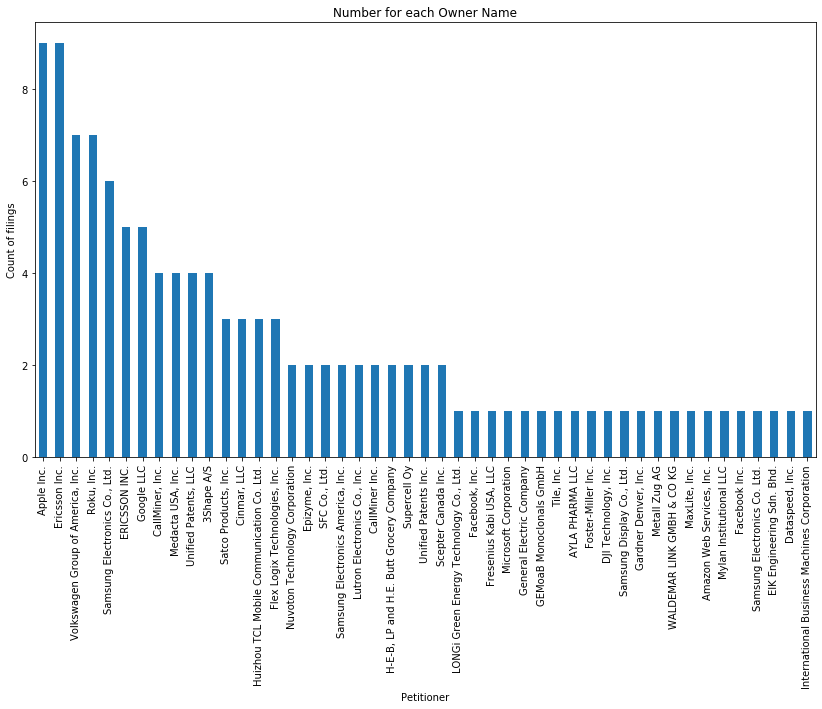

In [11]:
ax = df['petitionerPartyName'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("Petitioner")
ax.set_ylabel("Count of filings")